# Polarization rotation
Some simple examples for calculating polarization rotations for common passive and active polarization optics. It uses the __[Jones matrix](https://en.wikipedia.org/wiki/Jones_calculus#Jones_vector)__ approach implemented in Python.

## Jones matrix

Following the conventions of Jones matrices, the polarization can be represented as a two-row vector, with the H component on top, V on bottom. The vector represents the amplitude and phase of the electric field in the H and V directions. Here are the six standard states, H, V, +45, -45, left circular, right circular: 

In [186]:
import numpy as np
from numpy import pi,sqrt,cos,sin,tan,exp,conj,abs
import matplotlib.pyplot as plt
H = np.array([[ 1 ],  # horizontal polarization
              [ 0 ]])
V = np.array([[ 0 ],  # vertical polarization
              [ 1 ]])
D = np.array([[ +1 ], # diagonal +45° polarization
              [ +1 ]])/sqrt(2)
A = np.array([[ +1 ], # anti-diagonal -45° polarization
              [ -1 ]])/sqrt(2)
L = np.array([[ +1  ], # left circular polarization
              [ +1j ]])/sqrt(2)
R = np.array([[ +1  ], # right circular polarization
              [ -1j ]])/sqrt(2)
def ellipticalpolarization(θ,β): # θ = rotation angle, β = cirularity
    return np.array([[ cos(θ) ],
                     [ sin(θ)*exp(1j*β) ]])
def randompolarization(): # not unbiased
    return ellipticalpolarization(2*pi*np.random.random(),2*pi*np.random.random())

In this convention, polarization state of the light is a 1x2 vector, and the polarization optics are represented as 2x2 matrices.

## Polarizers

### Typical polarizers

In [187]:
Hpolarizer = np.array([[ 1, 0 ],
                       [ 0, 0 ]]);
Vpolarizer = np.array([[ 0, 0 ],
                       [ 0, 1 ]]);
Dpolarizer = np.array([[ +1, +1 ],
                       [ +1, +1 ]])*0.5;
Apolarizer = np.array([[ +1, -1 ],
                       [ -1, +1 ]])*0.5;
Lpolarizer = np.array([[ +1., -1j ],
                       [ +1j, +1. ]])*0.5;
Rpolarizer = np.array([[ +1., +1j ],
                       [ -1j, +1. ]])*0.5;
Dpolarizer @ A # equals zero, no -45 light gets through a +45 polarizer

array([[0.],
       [0.]])

### Arbitrary linear polarizer

In [188]:
def polarizer(θ,deg=False,alt=False): # to use degrees instead of radians, set deg equal to True
    θ = θ/180*pi if deg else θ
    if alt:
        return np.array([[1+cos(2*θ), sin(2*θ)],
                         [sin(2*θ), 1-cos(2*θ)]])*0.5
    return np.array([[cos(θ)*cos(θ), cos(θ)*sin(θ)],
                     [cos(θ)*sin(θ), sin(θ)*sin(θ)]]);
assert np.allclose(polarizer(5),polarizer(5,alt=True))
polarizer(60,deg=True) @ polarizer(-30,deg=True)  # equals zero, no light gets through orthogonal polarizers

array([[ 8.46748300e-17, -3.79148214e-17],
       [ 1.86851945e-16, -9.71445147e-17]])

### Plotting polarization

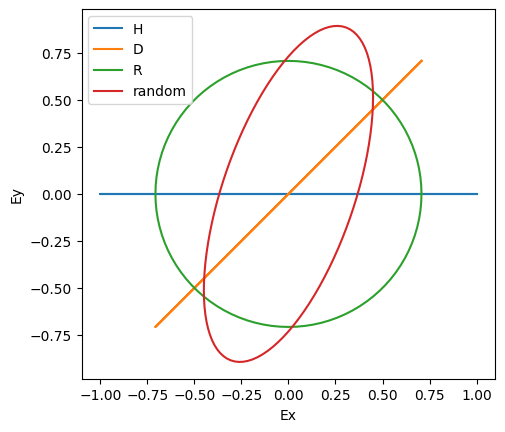

In [189]:
def exey(v,norm=False): # returns xs,ys for parametric plot of polarization ellipse
    θs = np.linspace(0,2*pi,101)
    u0 = sum(abs(v)**2) if norm else 1
    return np.real(v[0][0]*exp(1j*θs))/u0, np.real(v[1][0]*exp(1j*θs))/u0
plt.plot(*exey(H),label='H'); plt.plot(*exey(D),label='D'); plt.plot(*exey(R),label='R')
plt.plot(*exey(randompolarization()),label='random')
plt.legend(); plt.xlabel('Ex'); plt.ylabel('Ey'); plt.gca().set_aspect('equal'); plt.show()

### Stokes vector from Jones vector

In [190]:
def stokes(v):
    ex,ey = v[0][0],v[1][0]
    assert np.allclose(ex*ex.conj()+ey*ey.conj(), 1)
    S0,S1,S2,S3 = I,Q,U,V = 1., (ex*ex.conj()-ey*ey.conj()).real, (2*ex*ey.conj()).real, (-2*ex*ey.conj()).imag
    return np.array([S0,S1,S2,S3])
stokes(H),stokes(D),stokes(R)

(array([1., 1., 0., 0.]), array([1., 0., 1., 0.]), array([1., 0., 0., 1.]))

## Waveplates

### Typical waveplates

In [191]:
HQWP = np.array([[  1,   0 ], # quater wave plate with fast axis along horizontal
                 [  0, +1j ]])*exp(-1j*pi/4);
VQWP = np.array([[  1,   0 ], # quater wave plate with fast axis along vertical
                 [  0, -1j ]])*exp(+1j*pi/4);
HHWP = np.array([[-1j,   0 ], # half wave plate with fast axis along horizontal
                 [  0, +1j ]]);
VHWP = np.array([[+1j,   0 ], # half wave plate with fast axis along vertical
                 [  0, -1j ]]);
# show that HHWP == HQWP @ HQWP and VHWP == VQWP @ VQWP
np.allclose( HHWP, HQWP @ HQWP ), np.allclose( VHWP, VQWP @ VQWP )

(True, True)

### Arbitrary waveplates

In [192]:
def qwp(θ,deg=False,alt=False): # quarter wave plate with fast axis at angle θ
    θ = θ/180*pi if deg else θ
    if alt:
        return np.array([[ 1-1j*cos(2*θ), -1j*sin(2*θ) ],
                         [ -1j*sin(2*θ), 1+1j*cos(2*θ) ]])*sqrt(0.5)
    return np.array([[ cos(θ)**2+1j*sin(θ)**2,   (1-1j)*sin(θ)*cos(θ) ],
                     [   (1-1j)*sin(θ)*cos(θ), sin(θ)**2+1j*cos(θ)**2 ]])*exp(-1j*pi/4);
assert np.allclose( qwp(5), qwp(5,alt=True) )
def hwp(θ,deg=False,alt=False): # half wave plate with fast axis along angle θ
    θ = θ/180*pi if deg else θ
    if alt:
        return np.array([[ cos(2*θ),  sin(2*θ) ],
                         [ sin(2*θ), -cos(2*θ) ]])*(-1j)
    return np.array([[ cos(θ)**2-sin(θ)**2,     2*sin(θ)*cos(θ) ],
                     [     2*sin(θ)*cos(θ), sin(θ)**2-cos(θ)**2 ]])*(-1j);
assert np.allclose( hwp(5), hwp(5,alt=True) )
# show that a hwp is equal to two qwp, with all angles at 5 radians
np.allclose( hwp(5), qwp(5) @ qwp(5,alt=True) )

True

### Arbitrary linear retarder

Here is the matrix for a waveplate where the phase delay is not a quarter wave (α=π/4) or halfwave (α=π/2) but some arbitrary phase delay α.

In [193]:
def retarder(θ,α,deg=False): # wave plate with phase delay α between fast and slow axis, with fast axis at angle θ
    θ,α = θ/180*pi if deg else θ, α/180*pi if deg else α
    return np.array([[ cos(θ)**2+exp(1j*α)*sin(θ)**2,   (1-exp(1j*α))*sin(θ)*cos(θ) ],
                     [   (1-exp(1j*α))*sin(θ)*cos(θ), sin(θ)**2+exp(1j*α)*cos(θ)**2 ]])*exp(-1j*α/2);
# show that a qwp and hwp are equal to a retarder with a phase delay α of π/2 and π respectively
np.allclose( qwp(5), retarder(5,pi/2) ), np.allclose( hwp(5), retarder(5,pi) )

(True, True)

### Arbitrary birefringent material (elliptical phase retarder)

The Jones matrix for an arbitrary birefringent material can represent any polarization transformation.

In [194]:
def ellipticalretarder(θ,α,φ,deg=False):
    # θ is the angle of the fast axis
    # α is the phase retardation between fast and slow axis
    # φ is the circularity
    θ,α,φ = (θ/180*pi, α/180*pi, φ/180*pi) if deg else (θ,α,φ)
    return np.array([[          cos(θ)**2+exp(1j*α)*sin(θ)**2, exp(-1j*φ)*(1-exp(1j*α))*sin(θ)*cos(θ) ],
                     [ exp(+1j*φ)*(1-exp(1j*α))*sin(θ)*cos(θ),          sin(θ)**2+exp(1j*α)*cos(θ)**2 ]])*exp(-1j*α/2);

### Convert elliptical polarization to linear using a quarter wave plate

In [195]:
def circularity(v): # phase delay between Ex and Ey
    ex,ey = v[0][0],v[1][0]
    return np.arctan2(np.imag(ex*ey.conj()),np.real(ex*ey.conj()))
# circularity(H),circularity(D),circularity(R) # (0.0, 0.0, -1.5708)
def islinear(v):
    return any(np.isclose(circularity(v),[-pi,0,pi]))
# islinear(H),islinear(D),islinear(R) # (True, True, False)
def hvangle(v):
    return np.arctan2(np.abs(v[1][0]),np.abs(v[0][0]))
def semimajoraxisangle(v):
    # find β,θ such that (Ex,Ey) = (cos(θ),sin(θ)*exp(iβ))
    β,θ = circularity(v),hvangle(v)
    return 0.5*np.arctan(tan(2*θ)*cos(β))
def qwplinearize(v):
    ϕ = semimajoraxisangle(v)
    return qwp(ϕ) @ v
islinear(qwplinearize(ellipticalpolarization(5,5))),islinear(qwplinearize(randompolarization()))

(True, True)

Another example. For a polarization vector in the form $(1, \exp(iδ))$ the QWP angle to remove the ellipticity is always 45°.

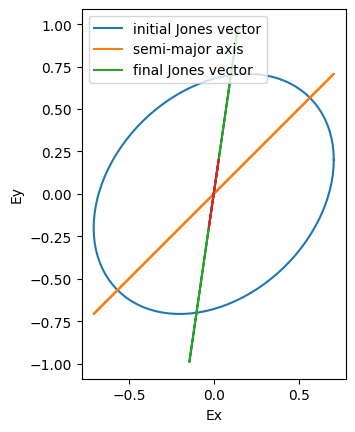

In [196]:
def diagonalwithdelay(δ):
    return [[sqrt(0.5)],[sqrt(0.5)*exp(1j*δ)]]
def finalangle(δ):
    return np.arctan2(cos(δ),1+sin(δ))
v = diagonalwithdelay(δ=5)
θqwp = semimajoraxisangle(v)
assert np.allclose( θqwp, pi/4 )
assert np.allclose( hvangle(qwplinearize([[sqrt(0.5)],[sqrt(0.5)*exp(1j*5)]])), np.arctan2(cos(5),1+sin(5)))
assert np.allclose( hvangle(qwp(θqwp)@v), finalangle(δ=5))
plt.plot(*exey(v),label='initial Jones vector')
plt.plot(*exey(hwp(semimajoraxisangle(v)/2)@H),label='semi-major axis')
plt.plot(*exey(qwp(θqwp) @ v),label='final Jones vector')
plt.plot(*exey(0.2*ellipticalpolarization(finalangle(δ=5),0)))
plt.legend(); plt.xlabel('Ex'); plt.ylabel('Ey'); plt.gca().set_aspect('equal'); plt.show()

## Electro-optic KTP modulator

In a KTP Pockels cell modulator, the phase delay between fast and slow axis can be controlled by a voltage. Therefore it is equivalent to an arbitrary linear retarder with a voltage dependent phase delay.

In [197]:
def ktp(v,Vpi=1,θ=0):
    return retarder(θ,v/Vpi*pi);

Sending H polarization into the KTP, with the KTP at a 45° angle, we get H out if the voltage is zero. (The output polarization is H if the bottom row of the vector is zero.)

In [198]:
ktp(0,θ=pi/4) @ H

array([[1.+0.j],
       [0.+0.j]])

However if the voltage is equal to Vpi, we get V polarization out. (Top row of vector is zero.)


In [199]:
ktp(1,θ=pi/4) @ H

array([[6.123234e-17+3.74939946e-33j],
       [0.000000e+00-1.00000000e+00j]])

### KTP amplitude modulator

In practice we send the output through a polarizer to get intensity modulation. The following plot calculates the resulting output intensity as a function of KTP voltage.

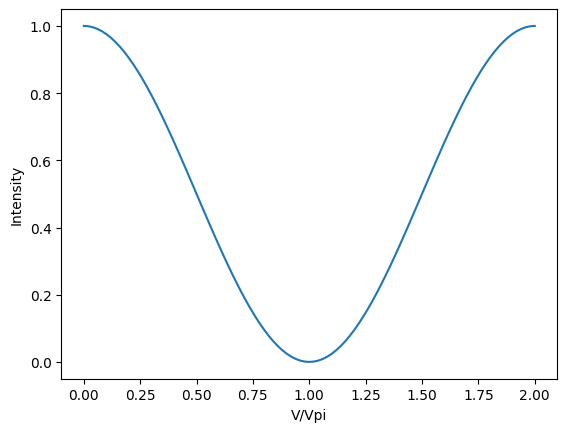

In [200]:
def intensity(v):
    return abs( conj(v.T) @ v ).item() # "item" turns 1x1 matrix into a number 
vv = np.linspace(0,2,101)
ii = np.array([intensity(Hpolarizer @ ktp(v,θ=pi/4) @ H) for v in vv])
plt.plot(vv,ii); plt.xlabel('V/Vpi'); plt.ylabel('Intensity'); plt.show()

### KTP modulator as a linear polarization rotator

If we use different polarizers on the output, we see the peak intensity at different voltages. At the voltages 0, 0.5, 1, 1.5 we get the states H, R, V, L respectively. (Assuming Vpi = 1 volt.)

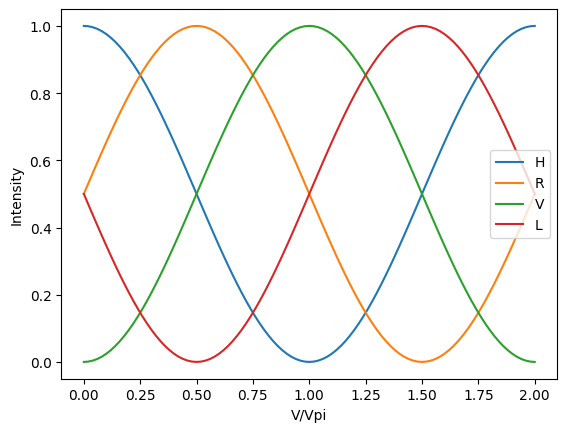

In [201]:
vv = np.linspace(0,2,101)
pols = [Hpolarizer,Rpolarizer,Vpolarizer,Lpolarizer]
iis = [np.array([intensity(p @ ktp(v,θ=pi/4) @ H) for v in vv]) for p in pols]
for ii,s in zip(iis,'HRVL'):
    plt.plot(vv,ii,label=s)
plt.legend(); plt.xlabel('V/Vpi'); plt.ylabel('Intensity'); plt.show()

If we also introduce a quarter wave plate after the KTP, we can get just the linear polarization states. At the voltages 0, 0.5, 1, 1.5 we get the states H, D, V, A respectively.

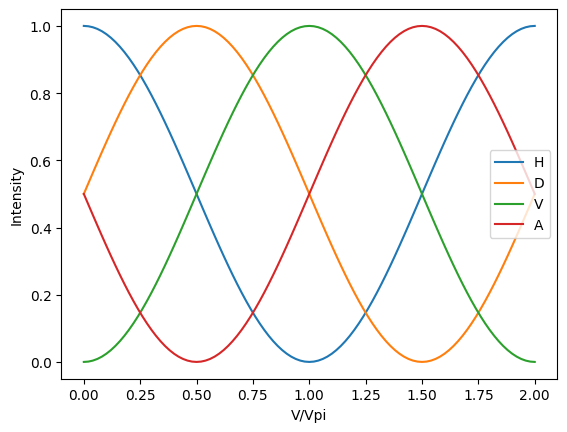

In [202]:
vv = np.linspace(0,2,101)
pols = [Hpolarizer,Dpolarizer,Vpolarizer,Apolarizer]
iis = [np.array([intensity(p @ qwp(0) @ ktp(v,θ=pi/4) @ H) for v in vv]) for p in pols]
for ii,s in zip(iis,'HDVA'):
    plt.plot(vv,ii,label=s)
plt.legend(); plt.xlabel('V/Vpi'); plt.ylabel('Intensity'); plt.show()

In fact with the QWP inserted the output polarization is linear at all voltages. Here is a plot for 5 radian polarizer angle.

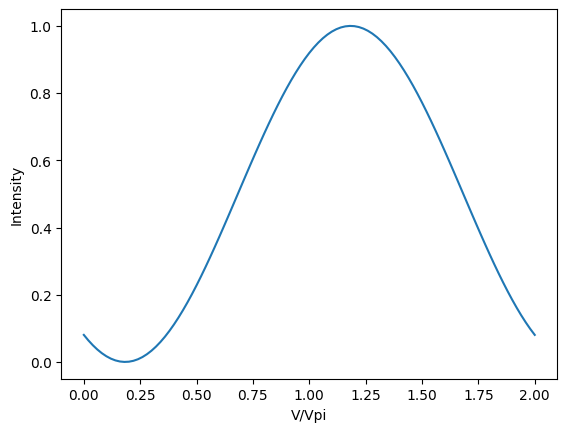

In [203]:
vv = np.linspace(0,2,101)
ii = np.array([intensity(polarizer(5) @ qwp(0) @ ktp(v,θ=pi/4) @ H) for v in vv])
plt.plot(vv,ii); plt.xlabel('V/Vpi'); plt.ylabel('Intensity'); plt.show()